# Assignment-7 : Variational Auto-Encoder(VAE)

### Team Members
- Praveen Raghuvanshi (praveenraghuvanshi@gmail.com)
- Tusharkanta Biswal (Tusharkanta_biswal@stragure.com)
- Suman Kanukollu (sumankanukollu@gmail.com)
- Shubham Kothawade (kothawadeshub@gmail.com)

System Information
---

In [1]:
!nvidia-smi

Fri Oct  2 17:13:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install torch==1.5.1+cu92 torchvision==0.6.1+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [3]:
import torch
from IPython.display import Image, clear_output 

print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1+cu92 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


Mount google drive
---

In [3]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install libraries
---

**Helper**
- autotime : Prints cell execution time
- torchsummary : Prints model summary

In [5]:
!pip install ipython-autotime
%load_ext autotime

In [6]:
pip install torchsummary

time: 2.02 s


Set Device
---

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [8]:
%cd '/content/drive/My Drive/eva-4/Phase-2/Session-7/temp'

/content/drive/My Drive/eva-4/Phase-2/Session-7/temp
time: 5.56 ms


In [9]:
!ls

model-vae.pt  model_vae.py  __pycache__  train_vae.py
time: 119 ms


Train model
---

In [10]:
!python train_vae.py --epochs 2000

Streaming output truncated to the last 5000 lines.
24it [00:01, 21.73it/s]            
10it [00:00, 23.29it/s]          
Train Loss: 4412.4074
Val Loss: 5278.1590
Epoch 1005 of 2000
24it [00:01, 23.50it/s]            
10it [00:00, 23.23it/s]          
Train Loss: 4409.7425
Val Loss: 5275.8322
Epoch 1006 of 2000
24it [00:01, 23.41it/s]            
10it [00:00, 21.48it/s]          
Train Loss: 4408.7558
Val Loss: 5289.2171
Epoch 1007 of 2000
24it [00:01, 22.91it/s]            
10it [00:00, 22.86it/s]          
Train Loss: 4411.0569
Val Loss: 5281.2424
Epoch 1008 of 2000
24it [00:01, 20.82it/s]            
10it [00:00, 21.41it/s]          
Train Loss: 4413.7077
Val Loss: 5280.3625
Epoch 1009 of 2000
24it [00:01, 21.34it/s]            
10it [00:00, 22.07it/s]          
Train Loss: 4415.2089
Val Loss: 5301.8376
Epoch 1010 of 2000
24it [00:01, 21.31it/s]            
10it [00:00, 23.20it/s]          
Train Loss: 4414.5917
Val Loss: 5265.6811
Epoch 1011 of 2000
24it [00:01, 23.09it/s]         

Results
---

In [11]:
from IPython.display import Image
display("Output after Epoch 1")
Image('../outputs/vae/output0.png')

'Output after Epoch 1'

time: 7.68 ms


'Output after Epoch 1000'

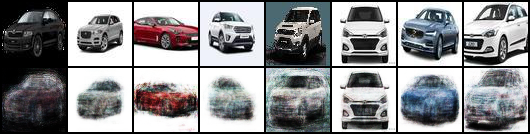

time: 9.41 ms


In [12]:
from IPython.display import Image
display("Output after Epoch 1000")
Image('../outputs/vae/output999.png')

'Output after Epoch 2000'

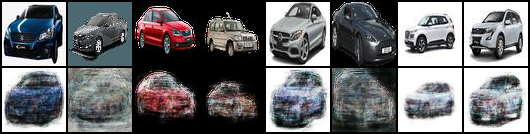

time: 6.81 ms


In [13]:
from IPython.display import Image
display("Output after Epoch 2000")
Image('../outputs/vae/output1999.png')

Load Model
---


In [5]:
%cd '/content/drive/My Drive/eva-4/Phase-2/Session-7/temp'

/content/drive/My Drive/eva-4/Phase-2/Session-7/temp


In [6]:
# Load Model
import torch

model = torch.load('model-vae.pt')
print(model)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


LinearVAE(
  (encoder): Sequential(
    (0): Linear(in_features=12288, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=12288, bias=True)
  )
)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [55]:
from torchvision.utils import save_image

with torch.no_grad():
    model.eval()
    sample = torch.randn(32, 32).to(device)
    sample = model.decoder(sample).cpu()
    print(sample.shape)
    sample = sample.view(-1, 3, 64, 64)[:8]
    print(type(sample))
    save_image(sample, 'fake_image.png')    

torch.Size([32, 12288])
<class 'torch.Tensor'>


'Generated fake image'

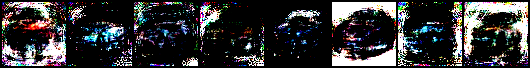

In [56]:
from IPython.display import Image
display("Generated fake image")
Image('fake_image.png')

In [57]:
sample.shape

torch.Size([8, 3, 64, 64])

(3, 64, 64)
<class 'numpy.ndarray'>
(64, 64)


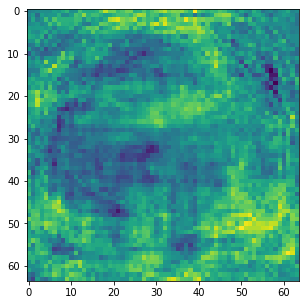

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sample = sample.detach().numpy()
sample = sample[0]
print(sample.shape)
print(type(sample))
fig = plt.figure(figsize=(5, 5))
print(sample[0].shape)
plt.imshow(sample[0])

In [59]:
import base64

s = base64.b64encode(sample[0])
print(s)



b'twfnvkiJeL768oq9dYntPGegAj0AgAQ8rCXhPmZ9bj5hajQ/ezOHP2KBNj1LnQ0+3ICsP345SD+LFEE/4jA4P5wBYz+obtE/CHMmQNcl7T+I9/A/wU6WP/SHuz9nye8/zlDxP1m7YD+V83g/grbBPyTrgT/OULY/NxjmPxyBDEB44iBAmxLjP99XA0BU2fs/nqgKQK1szj+AUY8/YMtMQIsKvj9kRJs/BD9oP5cimD+O6Yo/Cfy/PwIDoz8TRDU/qWX6PsftgL7cayc/b4g/PrDQC74KCWw/xlfpPgKkK7+aCpm+/HDkvNVn/74CP8o9RrmnPjNiQz/DcWm+6cj+vARmU75Q+78+GHxsvxa26T5YI/k9MGd+PrOghj5Oomo/m5UlvuAGJr5lnc4+zXazP/UWkj+AQApAOHlrPwN5pj/ySqI/1FlmP9UY5z66QiI/Qb+AP6XmqT//D6c/3Mm0P4ITjD82rfE//3MbQLKeDkAKcIM/eHK1P9cinj8KD+M+8xdvP4N/jT+hur8/7nTfPysp5LzFL9A+WWIZPz93Ob+8BvI+mrvNvvDDID58VCc/UlHoPwrI/j+uHQ9A9iUNQELsjT81dVg/FkiOvcWkjL8goOU8mDUvP0JZPz/dZpU+k1zZvpisgL88QhO+nTu0PWcg7j7A85M+LpcfPN97Er8SJfW+/M8sP1X33b6ewZU9hO+lPxNTVD51pcE/K71jP0+Tcj+JY2k/jQ5mP6wVoT/LH5g/o6aMPf9Ngz8mlNI+iLU3P4RidT5T2mI/c1kaQOFfKUB2ETlAVfoBQL4A4j82lf4/jxkeQNNVWj+Sfsk/03KOP29KoT/NYzM/SDkOQJj7KEC+cbY/3VKUP9Nk+T8j0dY/S/RBQGjZAkAjtSNAAZfrPwP0+z+ny9M/0Y7ePwTRqD/E5ag/dBHLP3K/vD9AUEY+sTahP/qq1D9oBQc/IqKmPyhBxL5p/JI+R19sP84ovT5s/Ia+ThwxP6

In [30]:
import io
import sys

with open('model-vae.pt', 'rb') as fh:
    bytestream = io.BytesIO(fh.read())

print(f'Model Size: {sys.getsizeof(bytestream) // (1024 * 1024)} MB')

Model Size: 48 MB
time: 69 ms


In [31]:
print('Loading model')
model = torch.load(bytestream)
print(model)
print('Model loaded')

Loading model
LinearVAE(
  (enc1): Linear(in_features=12288, out_features=512, bias=True)
  (enc2): Linear(in_features=512, out_features=32, bias=True)
  (dec1): Linear(in_features=32, out_features=512, bias=True)
  (dec2): Linear(in_features=512, out_features=12288, bias=True)
)
Model loaded
time: 35.6 ms


In [ ]:
def get_sample_image(decoder, latent_dims, n_samples=25):
    n_rows = int(np.sqrt(n_samples))
    sample = torch.randn(n_samples, latent_dims).to('cuda')
    sample = decoder(sample)#.cpu()
    sample = torch.cat([torch.cat([sample[n_rows*j+i] for i in range(n_rows)], dim=1) for j in range(n_rows)], dim=2)
    sample = np.transpose(sample.detach().numpy(),[1,2,0])
    sample = sample.astype(np.float)
    return np.clip(sample,0,1)

time: 6.77 ms


In [53]:
def img_to_base64(img):
    img = Image.fromarray(img, 'RGB') 
    buffer = io.BytesIO()
    img.save(buffer,format="JPEG")
    myimage = buffer.getvalue()                     
    img_str = f"data:image/jpeg;base64,{base64.b64encode(myimage).decode()}"
    return img_str

time: 1.82 ms


In [54]:
import numpy as np

fake_images = get_sample_image(model.dec2, latent_dims=32, n_samples=25)
fake_images_norm = np.uint8(fake_images*255)

RuntimeError: ignored

time: 17.4 ms
